<a href="https://colab.research.google.com/github/Gabriela-Reiss/CP2_RedesNeurais/blob/main/CP2_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Atividade - Treinamento de Redes Neurais com Keras**

### **Exercício 1**

**Dataset de pesquisa:** https://archive.ics.uci.edu/dataset/109/wine


Passo a passo de execução:

1. Usar o dataset Wine do UCI (arquivo wine.data)
2. Construir uma rede neural em Keras
3. Avaliar no conjunto de teste
4. Comparar com RandomForest e LogisticRegression (scikit-learn)
5. Apresentar as métricas de avaliação

In [ ]:
# Importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Nomes das colunas de acordo com o arquivo wine.names
colunas = [
    'Class',
    'Alcohol',
    'Malic_acid',
    'Ash',
    'Alcalinity_of_ash',
    'Magnesium',
    'Total_phenols',
    'Flavanoids',
    'Nonflavanoid_phenols',
    'Proanthocyanins',
    'Color_intensity',
    'Hue',
    'OD280/OD315_of_diluted_wines',
    'Proline'
]

In [ ]:
# Leitura do arquivo wine.data (sem cabeçalho)
df = pd.read_csv("wine.data", header=None, names=colunas)

print("Visualizando primeiras linhas do dataset:")
print(df.head())
print("\nDimensões:", df.shape)

Visualizando primeiras linhas do dataset:
   Class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280/OD315_of_diluted_wines  Proline  
0             5.64  1.04                          

In [ ]:
# Preparando dados (x= atributos, y = classes)
X = df.drop("Class", axis=1).values
y = df["Class"].values - 1


# Separando em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
# Normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encoding para a rede neural
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

In [ ]:
# Contruindo rede neural em Keras
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Treinamento
history = model.fit(
    X_train_scaled, y_train_cat,
    validation_split=0.2,
    epochs=200,
    batch_size=16,
    callbacks=[es],
    verbose=2
)

Epoch 1/200
8/8 - 2s - 299ms/step - accuracy: 0.4513 - loss: 1.0928 - val_accuracy: 0.8276 - val_loss: 0.8040
Epoch 2/200
8/8 - 0s - 14ms/step - accuracy: 0.5752 - loss: 0.9461 - val_accuracy: 0.9310 - val_loss: 0.6944
Epoch 3/200
8/8 - 0s - 15ms/step - accuracy: 0.6991 - loss: 0.7784 - val_accuracy: 0.8966 - val_loss: 0.6052
Epoch 4/200
8/8 - 0s - 15ms/step - accuracy: 0.7876 - loss: 0.7336 - val_accuracy: 0.9310 - val_loss: 0.5287
Epoch 5/200
8/8 - 0s - 15ms/step - accuracy: 0.8230 - loss: 0.6529 - val_accuracy: 0.9310 - val_loss: 0.4612
Epoch 6/200
8/8 - 0s - 14ms/step - accuracy: 0.8673 - loss: 0.5327 - val_accuracy: 0.9310 - val_loss: 0.4064
Epoch 7/200
8/8 - 0s - 14ms/step - accuracy: 0.9469 - loss: 0.4845 - val_accuracy: 0.9310 - val_loss: 0.3562
Epoch 8/200
8/8 - 0s - 14ms/step - accuracy: 0.8938 - loss: 0.4486 - val_accuracy: 0.9310 - val_loss: 0.3142
Epoch 9/200
8/8 - 0s - 13ms/step - accuracy: 0.9027 - loss: 0.4018 - val_accuracy: 0.9310 - val_loss: 0.2760
Epoch 10/200
8/8 -

In [ ]:
# Avaliação no teste
loss, acc = model.evaluate(X_test_scaled, y_test_cat, verbose=0)
print("\n=== Rede Neural (Keras) ===")
print(f"Acurácia no teste: {acc:.4f}")


=== Rede Neural (Keras) ===
Acurácia no teste: 0.9444


In [ ]:
# Previsões da rede
y_pred_keras = np.argmax(model.predict(X_test_scaled), axis=1)
print("\nRelatório de classificação (Rede Neural):")
print(classification_report(y_test, y_pred_keras))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

Relatório de classificação (Rede Neural):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.93      0.93      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



In [ ]:
# Modelo comparativo

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("\n=== Random Forest ===")
print(f"Acurácia no teste: {acc_rf:.4f}")
print(classification_report(y_test, y_pred_rf))


=== Random Forest ===
Acurácia no teste: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, solver='lbfgs')  # multinomial já é default
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
acc_lr = accuracy_score(y_test, y_pred_lr)

print("\n=== Logistic Regression ===")
print(f"Acurácia no teste: {acc_lr:.4f}")
print(classification_report(y_test, y_pred_lr))


=== Logistic Regression ===
Acurácia no teste: 0.9722
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



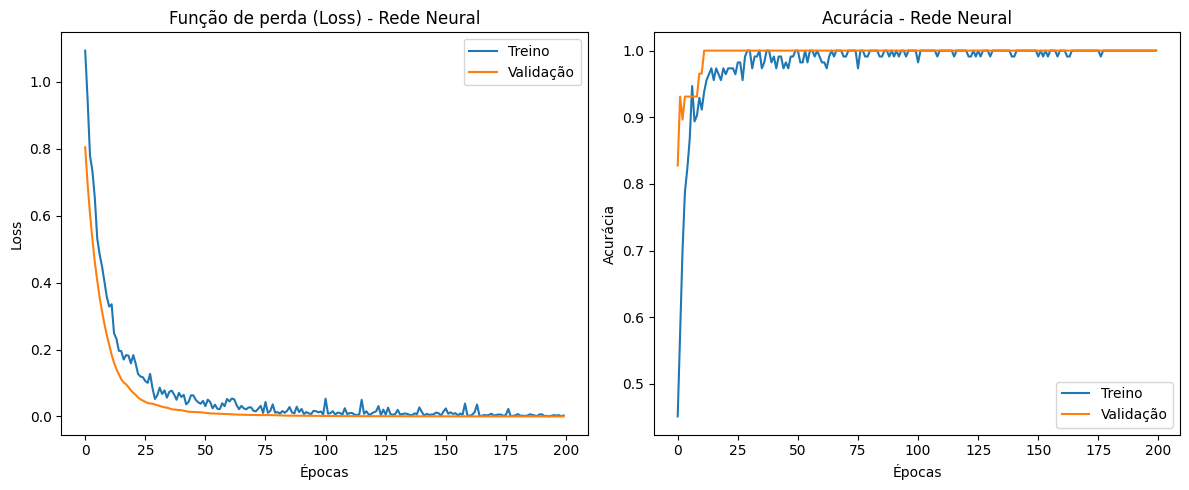

In [ ]:
# Visualizando historico de treino da rede

plt.figure(figsize=(12,5))

# Curva de perda
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title("Função de perda (Loss) - Rede Neural")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.legend()

# Curva de acurácia
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title("Acurácia - Rede Neural")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()

plt.tight_layout()
plt.show()


###**Conclusão**

Foram realizados três testes com Rede Neural (Keras), Random Forest e Regressão Logística — um a mais do que o pedido no exercício. Concluímos que o melhor modelo de classificação para o dataset Wine foi o Random Forest, que atingiu 100% de acurácia no conjunto de teste, classificando corretamente todas as amostras. Isso mostra que o modelo conseguiu separar perfeitamente as classes com base nos atributos químicos, superando a Rede Neural (94,4%) e a Regressão Logística (97,2%).

### **Exercício 2**

**Dataset de pesquisa**: California Housing Dataset

In [1]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models


In [2]:
# Configurar seed para reprodutibilidade
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# 1. CARREGAR E EXPLORAR O DATASET
california = fetch_california_housing()
X = california.data
y = california.target

print(f"\nShape dos dados: {X.shape}")
print(f"Shape do target: {y.shape}")
print(f"\nNomes das features: {california.feature_names}")
print(f"\nDescrição do target: Valor médio das casas em centenas de milhares de dólares")


Shape dos dados: (20640, 8)
Shape do target: (20640,)

Nomes das features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Descrição do target: Valor médio das casas em centenas de milhares de dólares


In [4]:
# Estatísticas básicas
print(f"\nEstatísticas do target (y):")
print(f"  Média: ${y.mean():.2f} (x100k)")
print(f"  Mediana: ${np.median(y):.2f} (x100k)")
print(f"  Min: ${y.min():.2f} (x100k)")
print(f"  Max: ${y.max():.2f} (x100k)")


Estatísticas do target (y):
  Média: $2.07 (x100k)
  Mediana: $1.80 (x100k)
  Min: $0.15 (x100k)
  Max: $5.00 (x100k)


In [5]:
# 2. DIVIDIR OS DADOS
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"  Treino: {X_train.shape[0]} amostras")
print(f"  Teste: {X_test.shape[0]} amostras")

  Treino: 16512 amostras
  Teste: 4128 amostras


In [6]:
# 3. NORMALIZAR OS DADOS
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# CRIAR E TREINAR A REDE NEURAL (KERAS)
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu', name='hidden_1'),
    layers.Dense(32, activation='relu', name='hidden_2'),
    layers.Dense(16, activation='relu', name='hidden_3'),
    layers.Dense(1, activation='linear', name='output')
])

In [8]:
# Compilar o modelo
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

print("\nArquitetura da Rede Neural:")
model.summary()


Arquitetura da Rede Neural:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_3 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Treinar o modelo
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

In [12]:
# Fazer previsões
y_pred_nn = model.predict(X_test_scaled, verbose=0).flatten()

In [13]:
# Calcular métricas
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"\nMétricas da Rede Neural:")
print(f"  RMSE: {rmse_nn:.4f}")
print(f"  MAE:  {mae_nn:.4f}")
print(f"  R²:   {r2_nn:.4f}")



Métricas da Rede Neural:
  RMSE: 0.5304
  MAE:  0.3575
  R²:   0.7853


In [14]:
# 5. MODELO LINEAR REGRESSION (SCIKIT-LEARN)
print("LINEAR REGRESSION (SCIKIT-LEARN)")

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"\nMétricas do Linear Regression:")
print(f"  RMSE: {rmse_lr:.4f}")
print(f"  MAE:  {mae_lr:.4f}")
print(f"  R²:   {r2_lr:.4f}")


5. LINEAR REGRESSION (SCIKIT-LEARN)

Métricas do Linear Regression:
  RMSE: 0.7456
  MAE:  0.5332
  R²:   0.5758


In [27]:
# 6. MODELO RANDOM FOREST REGRESSOR (SCIKIT-LEARN)
print("RANDOM FOREST REGRESSOR (SCIKIT-LEARN)")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
print("\nTreinando Random Forest...")
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nMétricas do Random Forest:")
print(f"  RMSE: {rmse_rf:.4f}")
print(f"  MAE:  {mae_rf:.4f}")
print(f"  R²:   {r2_rf:.4f}")


6. RANDOM FOREST REGRESSOR (SCIKIT-LEARN)

Treinando Random Forest...


KeyboardInterrupt: 

In [17]:
# Comparando modelos - Criação de DataFrame com resultados
results = pd.DataFrame({
    'Modelo': ['Rede Neural (Keras)', 'Linear Regression', 'Random Forest'],
    'RMSE': [rmse_nn, rmse_lr, rmse_rf],
    'MAE': [mae_nn, mae_lr, mae_rf],
    'R²': [r2_nn, r2_lr, r2_rf]
})

print("\n" + results.to_string(index=False))


             Modelo     RMSE      MAE       R²
Rede Neural (Keras) 0.530388 0.357489 0.785325
  Linear Regression 0.745581 0.533200 0.575788
      Random Forest 0.505143 0.327425 0.805275


In [18]:
# Identificar o melhor modelo
best_rmse = results.loc[results['RMSE'].idxmin(), 'Modelo']
best_mae = results.loc[results['MAE'].idxmin(), 'Modelo']
best_r2 = results.loc[results['R²'].idxmax(), 'Modelo']

print(f"\n🏆 Melhor modelo por RMSE: {best_rmse}")
print(f"🏆 Melhor modelo por MAE:  {best_mae}")
print(f"🏆 Melhor modelo por R²:   {best_r2}")


🏆 Melhor modelo por RMSE: Random Forest
🏆 Melhor modelo por MAE:  Random Forest
🏆 Melhor modelo por R²:   Random Forest


In [25]:
# Determinar o vencedor geral
rmse_scores = {'Rede Neural': rmse_nn, 'Linear Regression': rmse_lr, 'Random Forest': rmse_rf}
winner = min(rmse_scores, key=rmse_scores.get)

if winner == 'Random Forest':
    print(f"""
✓ O Random Forest apresentou o MELHOR desempenho geral:
  - Menor RMSE e MAE
  - Maior R²
  - Captura bem as não-linearidades do dataset
  - Não requer pré-processamento extensivo
    """)
elif winner == 'Rede Neural':
    print(f"""
✓ A Rede Neural apresentou o MELHOR desempenho geral:
  - Menor RMSE e MAE
  - Conseguiu aprender padrões complexos nos dados
  - Com mais ajuste (epochs, arquitetura) pode melhorar ainda mais
    """)
else:
    print(f"""
✓ A Regressão Linear apresentou desempenho competitivo:
  - Modelo mais simples e interpretável
  - Bom baseline considerando sua simplicidade
  - Indica que há forte componente linear nos dados
    """)

print("""
- Para produção: usar Random Forest ou Rede Neural (melhor performance)
- Para interpretabilidade: usar Linear Regression
- Para melhorar a Rede Neural: ajustar arquitetura, epochs, learning rate
- Considerar ensemble de modelos para melhor generalização
""")


✓ O Random Forest apresentou o MELHOR desempenho geral:
  - Menor RMSE e MAE
  - Maior R²
  - Captura bem as não-linearidades do dataset
  - Não requer pré-processamento extensivo
    

💡 RECOMENDAÇÕES:
- Para produção: usar Random Forest ou Rede Neural (melhor performance)
- Para interpretabilidade: usar Linear Regression
- Para melhorar a Rede Neural: ajustar arquitetura, epochs, learning rate
- Considerar ensemble de modelos para melhor generalização

EXERCÍCIO CONCLUÍDO! ✓
